# Facebook Ad Campaign

Source of dataset: [Kaggle](https://www.kaggle.com/madislemsalu/facebook-ad-campaign)

One of the digital marketing pains is Clicks But No Conversions, possible reason:

* Wrong audience targeted --- Age / Gender

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/abbylmm/DS_Uncut/main/facebook_ad_campaign.csv?token=APRFPNFVZWC5DFNGBLQTBQ3BQ75JW')

In [7]:
df.head()

,ad_id,reporting_start,reporting_end,campaign_id,fb_campaign_id,age,gender,interest1,interest2,interest3,impressions,clicks,spent,total_conversion,approved_conversion
0,708746,17/08/2017,17/08/2017,916,103916,30-34,M,15,17,17,7350.0,1,1.43,2.0,1.0
1,708749,17/08/2017,17/08/2017,916,103917,30-34,M,16,19,21,17861.0,2,1.82,2.0,0.0
2,708771,17/08/2017,17/08/2017,916,103920,30-34,M,20,25,22,693.0,0,0.00,1.0,0.0
3,708815,30/08/2017,30/08/2017,916,103928,30-34,M,28,32,32,4259.0,1,1.25,1.0,0.0
4,708818,17/08/2017,17/08/2017,916,103928,30-34,M,28,33,32,4133.0,1,1.29,1.0,1.0


In [8]:
# extract columns
selected_col = ['age', 'gender', 'spent', 'clicks', 'total_conversion']
df2 = df.loc[:,selected_col]
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1143 non-null   object 
 1   gender            1143 non-null   object 
 2   spent             1143 non-null   float64
 3   clicks            1143 non-null   int64  
 4   total_conversion  761 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 44.8+ KB


In [9]:
df2['age'].unique()

# discrepancies between range and categorical

array(['30-34', '35-39', '40-44', '45-49', '10', '15', '16', '18', '19',
       '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '31',
       '32', '36', '63', '64', '65', '2', '66', '30', '7', '100', '101',
       '102', '103', '105', '107', '110', '111', '112', '113', '108',
       '109', '114', '104', '106'], dtype=object)

In [10]:
options = ['30-34', '35-39', '40-44', '45-49']

# selecting rows based on condition
df3 = df2.loc[df2['age'].isin(options)]

In [11]:
df3['age'].unique()

array(['30-34', '35-39', '40-44', '45-49'], dtype=object)

In [12]:
for column in df3:
    print(df3[column].unique())

['30-34' '35-39' '40-44' '45-49']
['M' 'F']
[1.42999995e+00 1.82000002e+00 0.00000000e+00 1.25000000e+00
 1.28999996e+00 4.76999998e+00 1.26999998e+00 1.50000000e+00
 3.15999997e+00 1.02800002e+01 5.69999993e-01 1.69000006e+00
 4.63000011e+00 2.60999990e+00 3.04999995e+00 3.05999994e+00
 2.98000002e+00 5.52000010e+00 8.47000015e+00 1.58200002e+01
 1.47000003e+00 1.52999997e+00 1.80699997e+01 1.61000001e+00
 1.19000006e+00 9.22000027e+00 1.50999999e+00 9.43000007e+00
 6.96000004e+00 1.22000003e+00 2.79999995e+00 1.60000002e+00
 1.12999999e+00 5.73000002e+00 9.38000000e+00 5.63000000e+00
 3.84000003e+00 1.03999996e+00 1.46000004e+00 2.83999991e+00
 1.35000002e+00 5.75000000e+00 3.98000002e+00 4.44999993e+00
 1.32000005e+00 4.09000003e+00 1.00300001e+01 4.25000000e+00
 2.02900003e+01 1.38999999e+00 4.44000006e+00 1.57000005e+00
 1.40999997e+00 3.33300000e+01 3.34000009e+00 8.05000007e+00
 5.21000004e+00 2.34999996e+00 1.93299996e+01 1.45000005e+00
 4.05000007e+00 3.29799998e+01 3.12899995

In [13]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 761 entries, 0 to 760
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               761 non-null    object 
 1   gender            761 non-null    object 
 2   spent             761 non-null    float64
 3   clicks            761 non-null    int64  
 4   total_conversion  761 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 35.7+ KB


In [14]:
df3.describe()

,spent,clicks,total_conversion
count,761.000000,761.000000,761.000000
mean,25.782181,15.340342,2.161629
std,57.622334,32.715738,4.062201
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000
50%,3.580000,3.000000,1.000000
75%,23.210000,14.000000,2.000000
max,639.949998,340.000000,60.000000


In [15]:
df3.groupby('age').mean()

,spent,clicks,total_conversion
age,,,
30-34,23.526667,13.556575,2.721713
35-39,28.586222,16.694444,1.983333
40-44,31.205971,19.136691,1.690647
45-49,21.251043,13.704348,1.417391


In [16]:
df3.groupby('gender').mean()

,spent,clicks,total_conversion
gender,,,
F,8.909855,6.127273,1.170909
M,35.329280,20.553498,2.722222


### Data Visualization

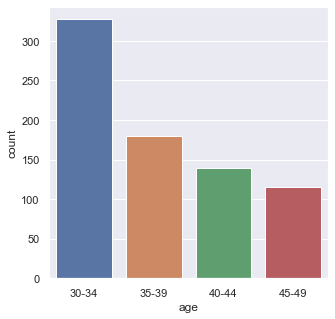

In [17]:
sns.set(rc={'figure.figsize':(5,5)})
fb = sns.countplot(x='age', data=df3, order=df3['age'].value_counts().index)

Text(0.5, 1.0, 'Clicks vs Conversion')

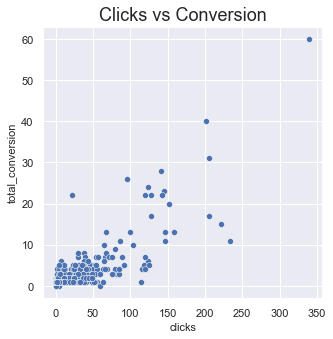

In [18]:
sns.scatterplot(x="clicks", y="total_conversion", data=df3)
plt.xlabel("clicks", size=11)
plt.ylabel("total_conversion", size=11)
plt.title("Clicks vs Conversion", size=18)

**Conclusion:**

- Highest average total conversion is Facebook users aged 30-34
- Highest average amount spent and clicks is Male users aged 40-44 (although total conversion is lower)
- Clicks below 50 is optimal